In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Adult dataset (CSV)
data = pd.read_csv("/content/adult_with_headers.csv")

In [3]:
# --- Basic exploration and initial preprocessing ---
# Show data structure and basic info
print("--- Data types and counts ---")
data.info()

--- Data types and counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Replace placeholder question-marks with actual NaN values and display missing counts
data.replace('?', np.nan, inplace=True)
print("\n--- Missing value counts ---")
print(data.isnull().sum())


--- Missing value counts ---
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [5]:
# For this workflow we drop rows containing any missing values
data.dropna(inplace=True)

In [6]:
# Descriptive statistics for numerical columns
print("\n--- Descriptive statistics ---")
print(data.describe())


--- Descriptive statistics ---
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [7]:
# Scaling setup: create two scalers (standard and min-max)
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
numeric_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [8]:
#  StandardScaler standardizes to mean=0 and sd=1 (useful for many linear models).
# MinMaxScaler rescales features to [0,1] (helpful for models or layers that expect bounded inputs).

In [9]:
# Fit-transform numeric columns with StandardScaler and store with new column suffix
scaled_std_df = pd.DataFrame(std_scaler.fit_transform(data[numeric_features]),
columns=[f"{c}_std" for c in numeric_features])
scaled_std_df

,age_std,fnlwgt_std,education_num_std,capital_gain_std,capital_loss_std,hours_per_week_std
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [10]:
# Fit-transform numeric columns with MinMaxScaler and store with different suffix
scaled_mm_df = pd.DataFrame(mm_scaler.fit_transform(data[numeric_features]),
columns=[f"{c}_minmax" for c in numeric_features])
scaled_mm_df

,age_minmax,fnlwgt_minmax,education_num_minmax,capital_gain_minmax,capital_loss_minmax,hours_per_week_minmax
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [11]:
# Attach scaled results back to the main dataframe
data = pd.concat([data.reset_index(drop=True), scaled_std_df, scaled_mm_df], axis=1)

In [13]:
# Encoding: check categorical columns and their unique counts
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
 print(f"{col}: {data[col].nunique()} unique values")

workclass: 9 unique values
education: 16 unique values
marital_status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native_country: 42 unique values
income: 2 unique values


In [14]:
# One-Hot Encode columns with small cardinality (<=5 categories)
onehot_candidates = [c for c in categorical_cols if data[c].nunique() <= 5]
data = pd.get_dummies(data, columns=onehot_candidates, drop_first=True)

In [16]:
# Label-encode remaining categorical columns (higher cardinality)
lbl_encoder = LabelEncoder()
label_candidates = [c for c in categorical_cols if c not in onehot_candidates]
for col in label_candidates:
 data[col] = lbl_encoder.fit_transform(data[col])

In [17]:
# Feature construction: generate a categorical feature for working hours
data['work_hours_group'] = pd.cut(data['hours_per_week'], bins=[0, 20, 40, 60, 100],
labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

In [18]:
# Feature construction: flag rows that have any capital gain
data['has_any_capital_gain'] = data['capital_gain'].apply(lambda v: 1 if v > 0 else 0)
# These engineered columns provide simple categorical signals about work pattern and capital earnings.

In [19]:
# Transform skewed numeric variables using log(1 + x) to reduce skewness
data['capital_gain_log'] = data['capital_gain'].apply(lambda x: np.log1p(x))

In [20]:
# Outlier detection using Isolation Forest on numeric features
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_flags = iso_forest.fit_predict(data[numeric_features])
# IsolationForest returns -1 for outliers and 1 for inliers
data['iforest_flag'] = outlier_flags

In [21]:
# Filter out detected outliers and drop the helper column afterwards
print(f"\nBefore outlier filtering: {data.shape}")
data = data[data['iforest_flag'] == 1].drop(columns=['iforest_flag'])
print(f"After outlier filtering: {data.shape}")


Before outlier filtering: (32561, 34)
After outlier filtering: (32235, 33)


In [23]:
# Install and import ppscore for predictive power analysis
# (In a Jupyter environment the following line runs pip. In pure .py, run pip separately.)
!pip install ppscore --quiet


import ppscore as pps

# Prepare DataFrame for PPS computations and ensure column names have no stray spaces
try:
 data
except NameError:
 data = pd.read_csv("adult_with_headers.csv")


data.columns = data.columns.str.strip()
print("DataFrame columns:", list(data.columns))


# Choose target variable if present, else default to last column
target_column = 'income' if 'income' in data.columns else data.columns[-1]
print('Using target for PPS:', target_column)


# For PPS analysis, select columns excluding boolean and category dtype to avoid issues
data_for_pps = data.select_dtypes(exclude=['bool', 'category'])
print('\nDtypes for PPS input:')
print(data_for_pps.dtypes)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 47.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
arviz 0.22.0 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.10.1 requires pandas>=2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
geopandas 1.1.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires

In [24]:
# Compute PPS matrix and list top predictors for the target
pps_dataframe = pps.matrix(data_for_pps, output='df')
top_pps = pps.predictors(data_for_pps, y=target_column).sort_values('ppscore', ascending=False)


print('\nTop PPS predictors for target =', target_column)
print(top_pps.head(10))


Top PPS predictors for target = capital_gain_log
                      x                 y   ppscore        case  \
0          capital_gain  capital_gain_log  0.998457  regression   
1      capital_gain_std  capital_gain_log  0.998457  regression   
2   capital_gain_minmax  capital_gain_log  0.998457  regression   
3  has_any_capital_gain  capital_gain_log  0.924786  regression   
4                   age  capital_gain_log  0.000000  regression   
5             workclass  capital_gain_log  0.000000  regression   
6                fnlwgt  capital_gain_log  0.000000  regression   
7             education  capital_gain_log  0.000000  regression   
8         education_num  capital_gain_log  0.000000  regression   
9        marital_status  capital_gain_log  0.000000  regression   

   is_valid_score               metric  baseline_score  model_score  \
0            True  mean absolute error        0.677972     0.001046   
1            True  mean absolute error        0.677972     0.001046   

Pivot via groupby/unstack failed: unstack() takes from 2 to 3 positional arguments but 4 were given


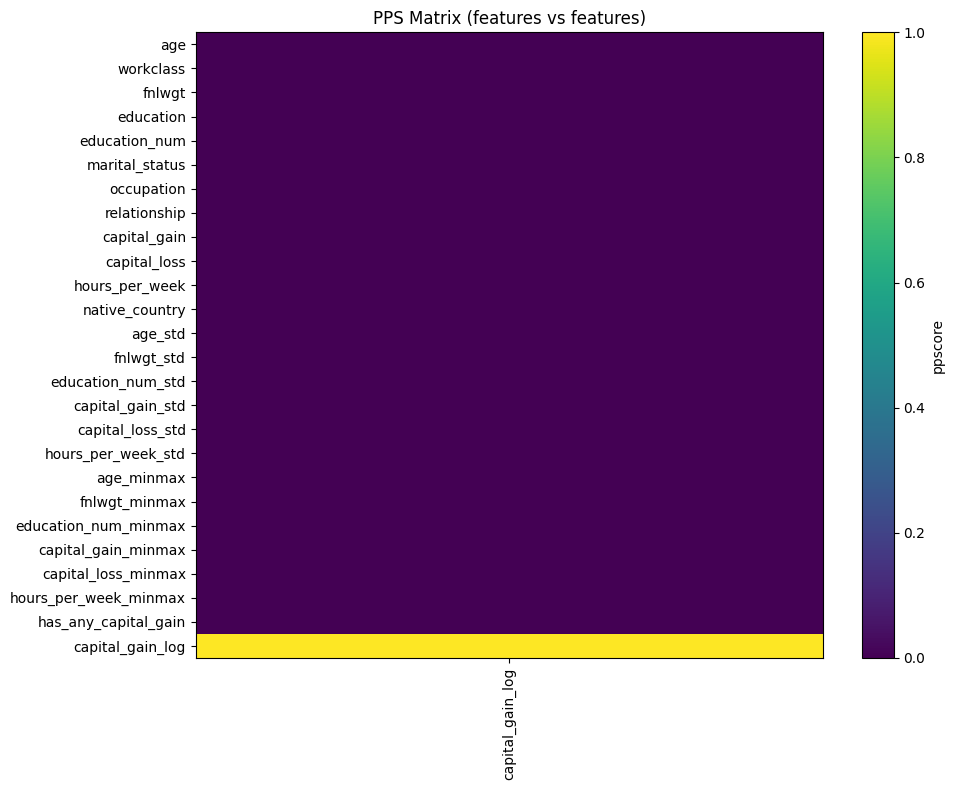

In [26]:
# Convert PPS results to a pivot-like table for visualization
try:
 pivot_table = pps_dataframe.groupby(['x', 'y'])['ppscore'].mean().unstack().fillna(0.0)
except Exception as exc:
 print(f"Pivot via groupby/unstack failed: {exc}")
x_vals = pps_dataframe['x'].unique()
y_vals = pps_dataframe['y'].unique()
temp = {}
for x in x_vals:
 temp[x] = {}
for y in y_vals:
 subset = pps_dataframe[(pps_dataframe['x'] == x) & (pps_dataframe['y'] == y)]
temp[x][y] = subset['ppscore'].iloc[0] if not subset.empty else 0.0
pivot_table = pd.DataFrame(temp).T.fillna(0.0)


plt.figure(figsize=(10, 8))
plt.imshow(pivot_table.values, aspect='auto', cmap='viridis')
plt.title('PPS Matrix (features vs features)')
plt.colorbar(label='ppscore')
plt.xticks(range(pivot_table.shape[1]), pivot_table.columns, rotation=90)
plt.yticks(range(pivot_table.shape[0]), pivot_table.index)
plt.tight_layout()
plt.show()

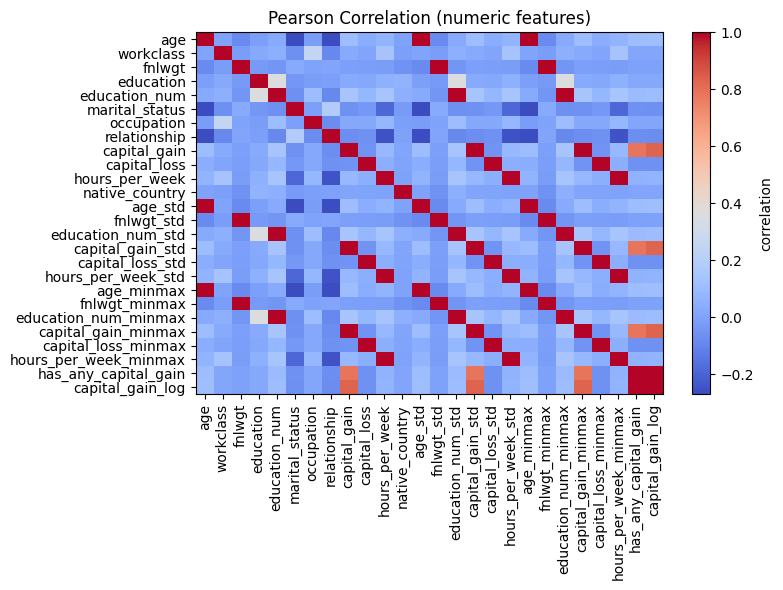


Top Pearson correlations with target: capital_gain_log
capital_gain_log        1.000000
has_any_capital_gain    0.995632
capital_gain_std        0.829529
capital_gain            0.829529
capital_gain_minmax     0.829529
age_std                 0.113960
age_minmax              0.113960
age                     0.113960
education_num           0.109553
education_num_minmax    0.109553
Name: capital_gain_log, dtype: float64


In [29]:
# Correlation matrix for numerical columns (for comparison with PPS results)
numeric_df = data.select_dtypes(include=np.number)


if numeric_df.shape[1] >= 2:
 corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix.values, aspect='auto', cmap='coolwarm')
plt.title('Pearson Correlation (numeric features)')
plt.colorbar(label='correlation')
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, rotation=90)
plt.yticks(range(corr_matrix.shape[0]), corr_matrix.index)
plt.tight_layout()
plt.show()


if target_column in numeric_df.columns:
 print('\nTop Pearson correlations with target:', target_column)
 print(corr_matrix[target_column].sort_values(ascending=False).head(10))
else:
 print('Insufficient numeric columns for correlation comparison.')

In [31]:
# encoding choices:
# - One-hot encoding avoids implying any order but increases feature dimensionality.
# - Label encoding is compact but can introduce artificial ordinal relationships.